In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_SAMPLES = 1000
NUM_CLASSES = 6
NUM_FEATURES = 2
RANDOM_SEED = 42


In [98]:
# CREATE MULTI-CLASS DATA
X_blob, y_blob = make_blobs(n_samples=NUM_SAMPLES,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED
                            )

# TURN DATA INTO TENSORS
X_blob: torch.Tensor = torch.from_numpy(X_blob).type(torch.float)
y_blob: torch.Tensor = torch.from_numpy(y_blob).type(torch.LongTensor)

print(f"Shape of X_blob: {X_blob.shape}")
print(f"Shape of y_blob: {y_blob.shape}")

Shape of X_blob: torch.Size([1000, 2])
Shape of y_blob: torch.Size([1000])


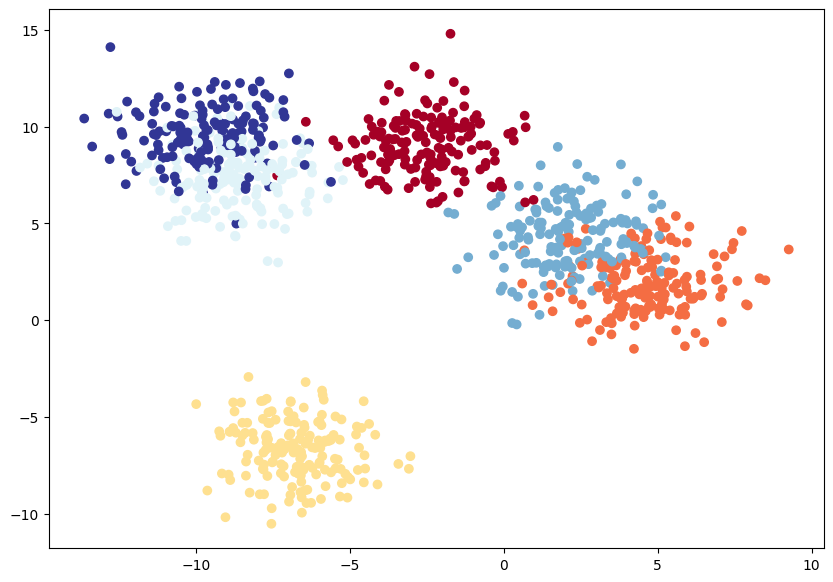

In [99]:
# SPLIT INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED
                                                    )

# PLOT DATA
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [100]:
print(f"Data Point: {X_train[0]}")

Data Point: tensor([0.2671, 1.4585])


In [101]:
import torch.nn as nn
class BlobseModel(nn.Module):
    def __init__(self):
     super().__init__()
     self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
      
        return self.Linear(x)
        
        
        
        

"""import torch.nn as nn
class BlobsModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10) #LAYER 1
        self.fc2 = nn.Linear(10, 10) #LAYER2
        self.fc3 = nn.Linear(10, 1)#LAYER3
        self.relu = nn.ReLU() #ACTIVATION FUNCTION
    def forward(self, x):
        return torch.unsqueeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))), dim=2) #KA2ENAHA FLATTEN"""
    
    

'import torch.nn as nn\nclass BlobsModel(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.fc1 = nn.Linear(2, 10) #LAYER 1\n        self.fc2 = nn.Linear(10, 10) #LAYER2\n        self.fc3 = nn.Linear(10, 1)#LAYER3\n        self.relu = nn.ReLU() #ACTIVATION FUNCTION\n    def forward(self, x):\n        return torch.unsqueeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))), dim=2) #KA2ENAHA FLATTEN'

In [108]:
model: nn.Module = BlobseModel()
print(model)

BlobseModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [109]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
BlobseModel                              --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       30
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       110
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       11
Total params: 151
Trainable params: 151
Non-trainable params: 0

In [110]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters()#method in PyTorch returns an iterator over the learnable parameters of the model.
                                        #The learnable parameters are the weights and biases of the model.
                       , lr=0.001)

In [111]:
from helper_functions import plot_decision_boundary

def plot_boundaries( #plots the decision boundaries of a neural network model.
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

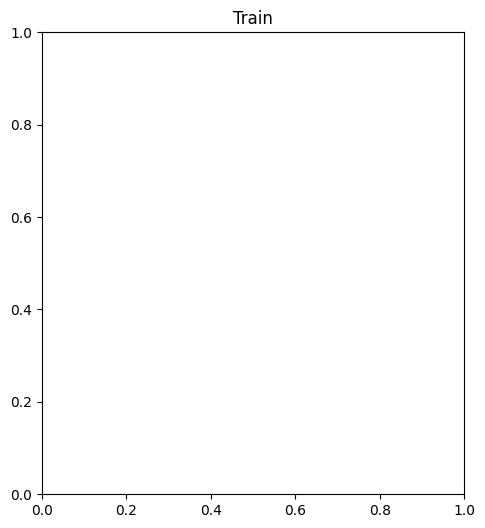

In [112]:
plot_boundaries(model)

In [107]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

ValueError: Target size (torch.Size([800])) must be the same as input size (torch.Size([800, 1, 1]))